# A, the, and, or

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
import bz2
import ujson
import attr
import os
import math

import pandas as pd

from glob import glob
from collections import Counter, UserDict
from itertools import islice
from tqdm import tqdm_notebook

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [7]:
ds = Dataset('../../data/a-the-and-or.json/')

In [15]:
rows = []
for novel in ds.novels():
    for token, counts in novel['counts'].items():
        
        total = sum(counts)
        
        if total == 0:
            continue
        
        for bin, count in enumerate(counts):
            rows.append((token, bin, count/total))

HBox(children=(IntProgress(value=0), HTML(value='')))

In [16]:
bc = pd.DataFrame(rows, columns=('token', 'bin', 'pct'))

# a

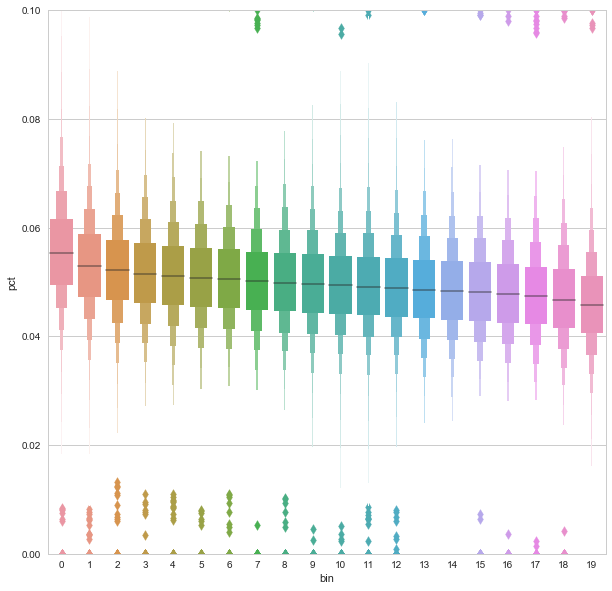

In [18]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 0.1)

sns.lvplot(data=bc[bc['token']=='a'], x='bin', y='pct')

# the

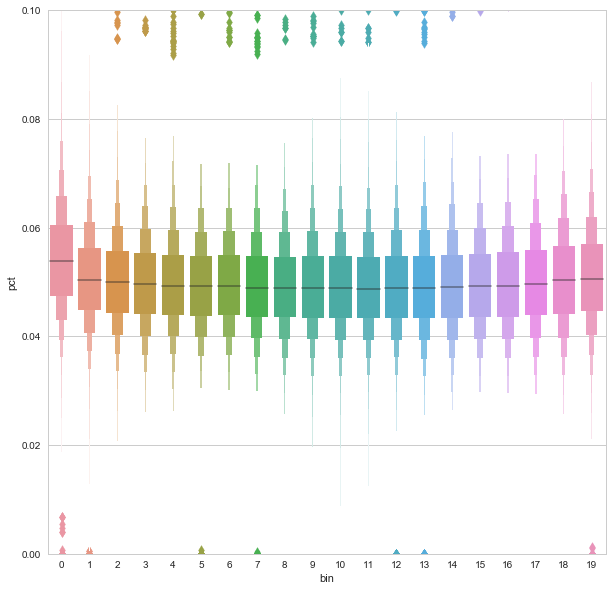

In [19]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 0.1)

sns.lvplot(data=bc[bc['token']=='the'], x='bin', y='pct')

# and

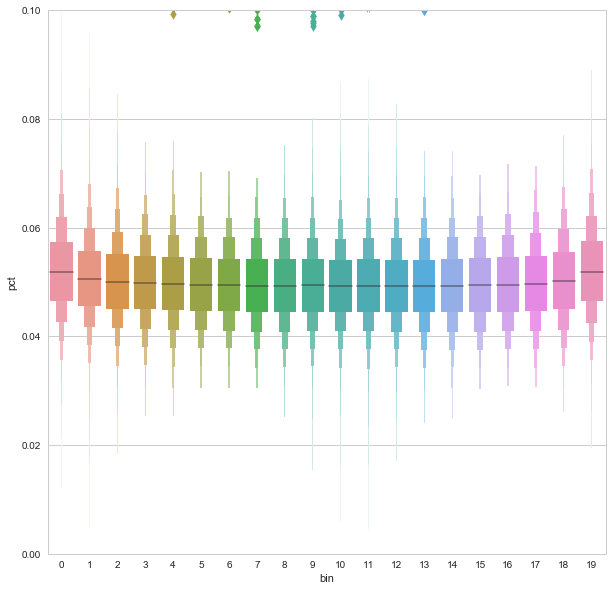

In [20]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 0.1)

sns.lvplot(data=bc[bc['token']=='and'], x='bin', y='pct')

# or

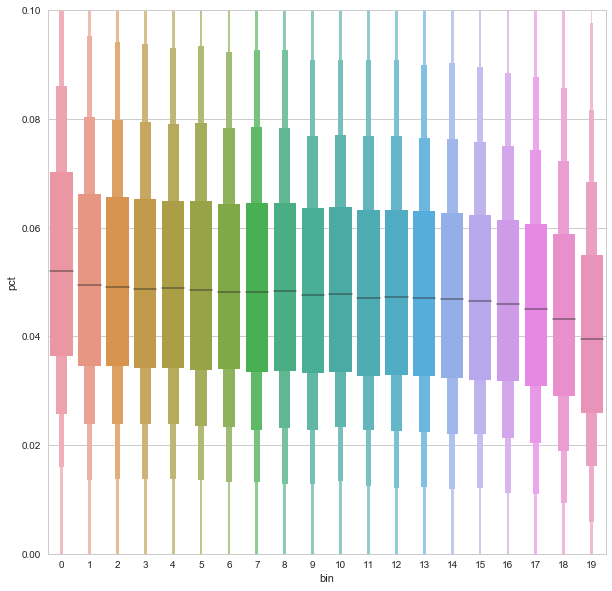

In [21]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 0.1)

sns.lvplot(data=bc[bc['token']=='or'], x='bin', y='pct')